# EE399 HW3
## Ziwen


https://github.com/ZiwenLi0325/EE399.git

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Load MNIST data set
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float64')
y = mnist.target.astype('int64')



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

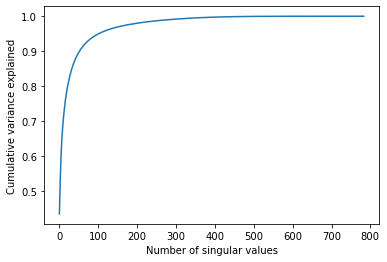

In [3]:
# Perform SVD analysis
U, S, Vt = np.linalg.svd(X, full_matrices=False)

plt.plot(np.cumsum(S**2) / np.sum(S**2))
plt.xlabel('Number of singular values')
plt.ylabel('Cumulative variance explained')
plt.show()



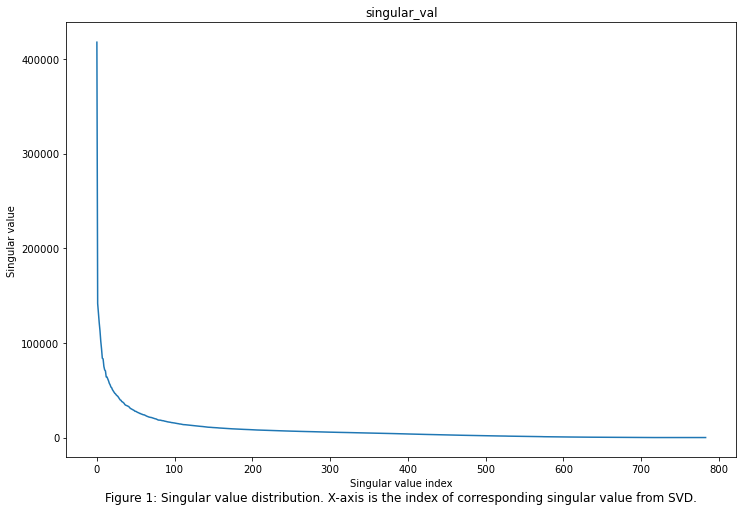

In [12]:
plt.plot(S)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.text(0.5, -0.1 ,'Figure 1: Singular value distribution. X-axis is the index of corresponding singular value from SVD.', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.title("singular_val")
plt.gcf().set_size_inches(12, 8)
plt.savefig("singular_val.png")
plt.show()


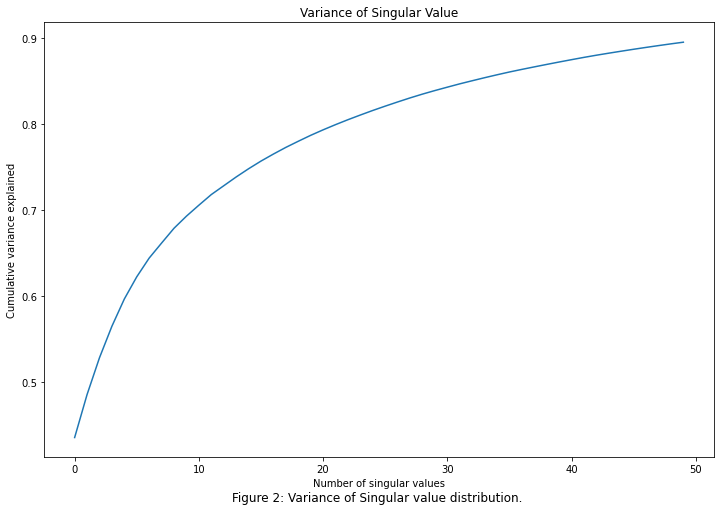

In [13]:
cumulative_var = np.cumsum(S**2) / np.sum(S**2)
plt.plot(cumulative_var[:50])
plt.xlabel('Number of singular values')
plt.ylabel('Cumulative variance explained')
plt.text(0.5, -0.1 ,'Figure 2: Variance of Singular value distribution. ', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.title("Variance of Singular Value")
plt.gcf().set_size_inches(12, 8)
plt.savefig("singular_val_var.png")
plt.show()

In [14]:
threshold = 1e-10
rank = np.sum(S > threshold)
print(rank)
print(np.linalg.matrix_rank(X))

714
713


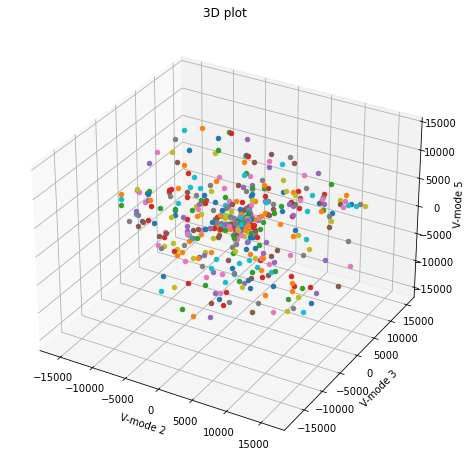

In [20]:
# Select three V-modes
V_modes = U[:, [2, 3, 5]]

# Project the digit images onto the selected V-modes
proj = np.array(X.T @ V_modes)

# Create a 3D plot with digit labels as colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(proj.shape[0]):
    x, y, z = proj[i, :]
    ax.scatter(x, y, z, cmap='viridis')
ax.set_xlabel('V-mode 2')
ax.set_ylabel('V-mode 3')
ax.set_zlabel('V-mode 5')
plt.title("3D plot")
plt.gcf().set_size_inches(12, 8)
plt.savefig("3D_plot.png")
plt.show()


### classifer

### {i}

In [8]:
# Separate features (input) and labels (output) from data set
X, y = mnist["data"], mnist["target"]

# Convert labels to integers
y = y.astype(np.uint8)

# Divide the data set into training and test sets
X_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# Select the digits to classify
digit1 = 1
digit2 = 7

# Extract the corresponding images and labels
mask = (y_train == digit1) | (y_train == digit2)
X = X_train[mask]
y = y_train[mask]
y = (y == digit1).astype(int)  # 1 for digit1, 0 for digit2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform SVD on the training data to reduce its dimensionality
U, s, Vt = np.linalg.svd(X_train, full_matrices=False)


# Compute the LDA projection matrix using the reduced training data
lda = LDA()
lda.fit(X_train, y_train)
W = lda.coef_.T

# Project the reduced training and testing data onto the LDA subspace
X_train_lda = X_train @ W
X_test_lda = X_test @ W

# Train a logistic regression model on the LDA-projected training data
clf = LogisticRegression(random_state=42)
clf.fit(X_train_lda, y_train)

# Evaluate the model's performance on the LDA-projected testing data
accuracy = clf.score(X_test_lda, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


### {ii}

In [9]:


# Extract the data and labels
X = mnist.data.astype('float64')
y = mnist.target.astype('int64')

# Choose three digits to classify
digits = [2, 3, 8]

# Filter the data and labels to only include the selected digits
X_filtered = X[np.isin(y, digits)]
y_filtered = y[np.isin(y, digits)]

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Reduce the dimensionality of the data using SVD
U, s, Vt = np.linalg.svd(X_train, full_matrices=False)

# Compute the LDA projection matrix using the reduced training data
lda = LDA()
lda.fit(X_train, y_train)
W = lda.coef_

# Project the test data onto the LDA projection matrix
X_test_lda = X_test @ W.T

# Compute the accuracy of the classifier on the test data
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')


Accuracy: 0.935


### {iii}

In [10]:
# Define the digits to classify
digit1 = '4'
digit2 = '9'

# Create a binary classification dataset for the two digits
X = mnist.data[(mnist.target == digit1) | (mnist.target == digit2)]
y = mnist.target[(mnist.target == digit1) | (mnist.target == digit2)]
y = np.array([int(d == digit2) for d in y])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA object and fit it to the training data
lda = LDA()
lda.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = lda.predict(X_test)

# Compute the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Compute the accuracy for each digit separately
acc_digit1 = accuracy_score(y_test[y_test==0], y_pred[y_test==0])
acc_digit2 = accuracy_score(y_test[y_test==1], y_pred[y_test==1])

print(f"Accuracy for digit {digit1}: {acc_digit1}")
print(f"Accuracy for digit {digit2}: {acc_digit2}")


Accuracy for digit 4: 0.9538239538239538
Accuracy for digit 9: 0.9635302698760029


### (iv)

In [11]:
# Define the digits to classify
digit1 = '0'
digit2 = '5'

# Create a binary classification dataset for the two digits
X = mnist.data[(mnist.target == digit1) | (mnist.target == digit2)]
y = mnist.target[(mnist.target == digit1) | (mnist.target == digit2)]
y = np.array([int(d == digit2) for d in y])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA object and fit it to the training data
lda = LDA()
lda.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = lda.predict(X_test)

# Compute the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Compute the accuracy for each digit separately
acc_digit1 = accuracy_score(y_test[y_test==0], y_pred[y_test==0])
acc_digit2 = accuracy_score(y_test[y_test==1], y_pred[y_test==1])

print(f"Accuracy for digit {digit1}: {acc_digit1}")
print(f"Accuracy for digit {digit2}: {acc_digit2}")


Accuracy for digit 0: 0.9860499265785609
Accuracy for digit 5: 0.983619344773791


In [12]:
# Define X and y
X = mnist.data
y = mnist.target.astype(int)

# Choose digit 0 and digit 5
digits = [0, 5]
idx = np.isin(y, digits)
X = X[idx]
y = y[idx]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit LDA to the training data
lda = LDA()
lda.fit(X_train, y_train)

# Predict on the test data
y_pred = lda.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy for separating digit 0 and digit 5: {:.3f}".format(accuracy))


Accuracy for separating digit 0 and digit 5: 0.984


In [21]:
def classfier(X,y,i,j):
    # Define X and y
   
    digits = [i, j]
    idx = np.isin(y, digits)
    X = X[idx]
    y = y[idx]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Fit LDA to the training data
    lda = LDA()
    lda.fit(X_train, y_train)

    # Predict on the test data
    y_pred = lda.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    #print("Accuracy for separating digit "+ str(i) +"  and digit " + str(j) +" : {:.3f}".format(accuracy))
    return accuracy

In [24]:
accuracy_matrix = np.zeros([10,10])
X = mnist.data
y = mnist.target.astype(int)
for i in range(10):
    for j in range(10):
        accuracy_matrix[i,j] = classfier(X,y,i,j)

(3, 5)


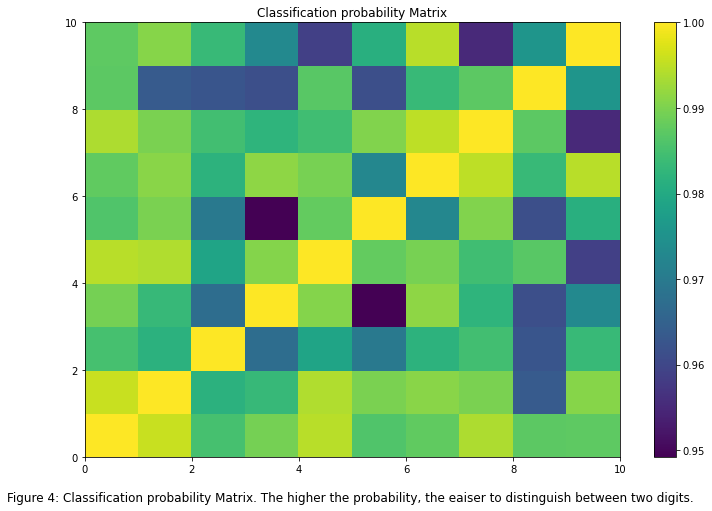

In [26]:
plt.pcolor(accuracy_matrix)
plt.colorbar()
min_idx = np.unravel_index(np.argmin(accuracy_matrix), accuracy_matrix.shape)
# print the result
print(min_idx)
plt.title("Classification probability Matrix")
plt.gcf().set_size_inches(12, 8)
plt.text(0.5, -0.1 ,'Figure 4: Classification probability Matrix. The higher the probability, the eaiser to distinguish between two digits. ', ha='center', fontsize=12, transform=plt.gca().transAxes)
plt.savefig("Classification.png")
plt.show()

In [31]:
# Find the index i,j with the smallest entry
large = 0
for i in range(10):
    for j in range(10):
        if accuracy_matrix[i,j] > large and i!=j:
            large = accuracy_matrix[i,j] 
            i_index = i
            j_index = j
print(f"The index i,j with the smallest entry is ({i_index}, {j_index})")
print(large)

The index i,j with the smallest entry is (0, 1)
0.9956698240866035


In [30]:
print(accuracy_matrix[i_index,j_index])
print(accuracy_matrix[min_idx])

0.9956698240866035
0.9491676575505351


In [43]:
# Get indices of all images with the digits 0 and 1
idx_01 = np.where((y == 0) | (y == 1))[0]
X_01, y_01 = np.array(X)[idx_01], np.array(y)[idx_01]

# Split the data into training and testing sets
X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(X_01, y_01, test_size=0.2, random_state=42)

# Train LDA classifier
lda = LDA()
lda.fit(X_train_01, y_train_01)

# Train SVM classifier
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_01, y_train_01)

# Train decision tree classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_01, y_train_01)

# Test the classifiers on the test set
y_pred_lda = lda.predict(X_test_01)
y_pred_svm = svm.predict(X_test_01)
y_pred_dtc = dtc.predict(X_test_01)

# Calculate the accuracy scores
accuracy_lda = accuracy_score(y_test_01, y_pred_lda)
accuracy_svm = accuracy_score(y_test_01, y_pred_svm)
accuracy_dtc = accuracy_score(y_test_01, y_pred_dtc)

print("Accuracy scores for LDA, SVM, and decision tree classifiers on digits 0 vs 1:")
print("LDA: {:.2f}%".format(accuracy_lda * 100))
print("SVM: {:.2f}%".format(accuracy_svm * 100))
print("Decision Tree: {:.2f}%".format(accuracy_dtc * 100))

Accuracy scores for LDA, SVM, and decision tree classifiers on digits 0 vs 5:
LDA: 99.53%
SVM: 99.97%
Decision Tree: 99.80%


In [44]:
# Get indices of all images with the digits 0 and 1
idx_35 = np.where((y == 3) | (y == 5))[0]
X_35, y_35 = np.array(X)[idx_35], np.array(y)[idx_35]

# Split the data into training and testing sets
X_train_35, X_test_35, y_train_35, y_test_35 = train_test_split(X_35, y_35, test_size=0.2, random_state=42)

# Train LDA classifier
lda = LDA()
lda.fit(X_train_35, y_train_35)

# Train SVM classifier
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_35, y_train_35)

# Train decision tree classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_35, y_train_35)

# Test the classifiers on the test set
y_pred_lda = lda.predict(X_test_35)
y_pred_svm = svm.predict(X_test_35)
y_pred_dtc = dtc.predict(X_test_35)

# Calculate the accuracy scores
accuracy_lda = accuracy_score(y_test_35, y_pred_lda)
accuracy_svm = accuracy_score(y_test_35, y_pred_svm)
accuracy_dtc = accuracy_score(y_test_35, y_pred_dtc)

print("Accuracy scores for LDA, SVM, and decision tree classifiers on digits 3 vs 5:")
print("LDA: {:.2f}%".format(accuracy_lda * 100))
print("SVM: {:.2f}%".format(accuracy_svm * 100))
print("Decision Tree: {:.2f}%".format(accuracy_dtc * 100))